In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [12]:
df = pd.read_csv("E:/21KDT-Project-master/4. dms_seoul_avg.csv")
df.head()

,date,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,2015-04-06,199,12.214286,5.285714,0,3.371429,68.757143,8.880000
1,2015-04-07,146,11.571429,4.928571,0,3.428571,65.742857,9.891429
2,2015-04-08,90,10.914286,4.571429,0,3.257143,63.542857,9.927143
3,2015-04-09,172,10.171429,0.571429,0,2.871429,59.614286,10.884286
4,2015-04-10,249,10.314286,0.071429,0,2.871429,53.485714,12.777143


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
y = df['mosquito'].values 
X = df.drop(['mosquito','date'], axis=1).values 

In [15]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [ -5675803.227 -13212243.255  -2220877.513  -3368844.086  -2198043.067]
5 folds 의 개별 RMSE scores:  [2382.394 3634.865 1490.261 1835.441 1482.58 ]
5 folds 의 평균 RMSE : 2165.108 


In [26]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))
    

alpha 0 일 때 5 folds 의 평균 RMSE : 2167.338
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2167.314
alpha 1 일 때 5 folds 의 평균 RMSE : 2167.099
alpha 10 일 때 5 folds 의 평균 RMSE : 2165.108
alpha 100 일 때 5 folds 의 평균 RMSE : 2153.845


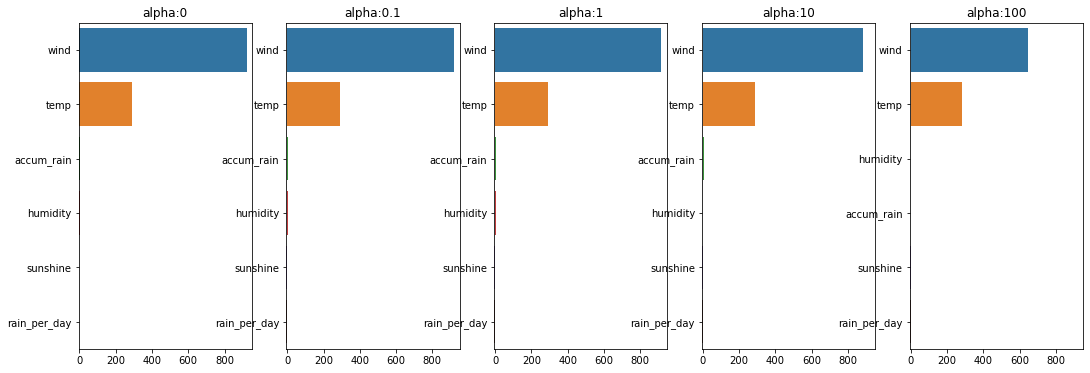

In [38]:
# alpha값에 따른 coefficient 회귀계수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for rid, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    coeff = pd.Series(data=ridge.coef_, index= ['temp', 'rain_per_day', 'accum_rain', 'wind', 'humidity', 'sunshine'])
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)   
    axs[rid].set_title(colname)
    axs[rid].set_xlim(-5, 950)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[rid])

plt.show()

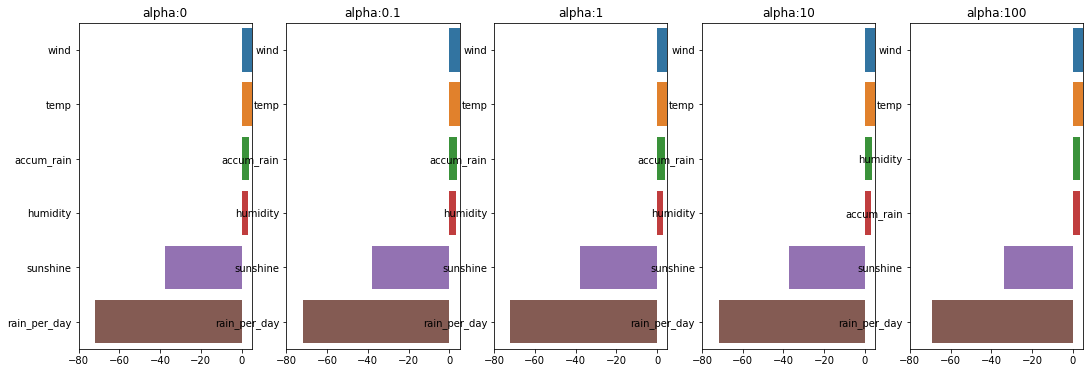

In [41]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for rid, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    coeff = pd.Series(data=ridge.coef_, index= ['temp', 'rain_per_day', 'accum_rain', 'wind', 'humidity', 'sunshine'])
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)   
    axs[rid].set_title(colname)
    axs[rid].set_xlim(-80, 5)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[rid])

plt.show()

In [37]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
wind,921.346668,920.957745,917.472053,884.003679,647.201526
temp,290.595004,290.584649,290.491783,289.594254,282.817637
accum_rain,3.696509,3.696266,3.694086,3.673099,3.520593
humidity,3.096010,3.096685,3.102755,3.162941,3.726950
sunshine,-37.746767,-37.741607,-37.695329,-37.247251,-33.807538
rain_per_day,-72.081868,-72.077815,-72.041477,-71.691930,-69.171505
